# Titanic

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Making graphs look nice for the theme I'm using
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/patrickfahy99/Documents/Kaggle_datasets/titanic/train.csv")
X_test = pd.read_csv("/Users/patrickfahy99/Documents/Kaggle_datasets/titanic/test.csv")

df.index = df["PassengerId"]

X_test.index = X_test["PassengerId"]

y = df["Survived"]
X = df.drop(labels = ["Survived"],axis = 1)

In [3]:
# Having a look at the datasets to look for missing values

X.info()
print("\n")
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null

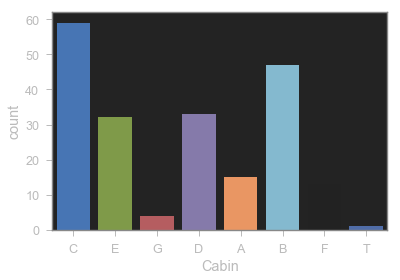

In [4]:
# I will look at the Cabin column first. Note I had some help from the kernel 
# 'https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial'.
df_new_cab = df[df['Cabin'] == df['Cabin']]
sns.countplot(df_new_cab['Cabin'].apply(lambda x: list(x)[0]))
df_deck = df_new_cab['Cabin'].apply(lambda x: list(x)[0])

### List of information about Cabin:

On the Boat Deck there were 6 rooms labeled as T, U, W, X, Y, Z but only the T cabin is present in the dataset.

A, B and C decks were only for 1st class passengers.

D and E decks were for all classes.

F and G decks were for both 2nd and 3rd class passengers.

From going A to G, distance to the staircase increases which might be a factor of survival.

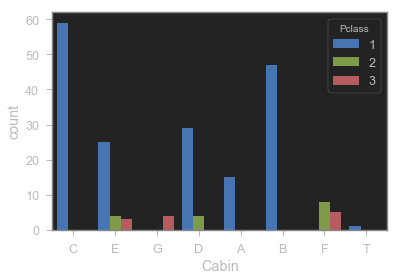

In [5]:
sns.countplot(df_deck, hue=df['Pclass'])

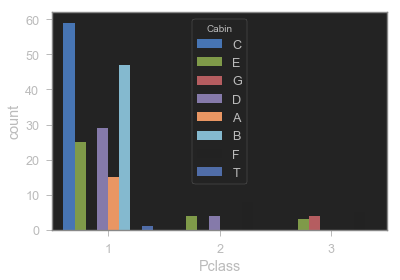

In [6]:
sns.countplot(df_new_cab['Pclass'], hue=df_deck)

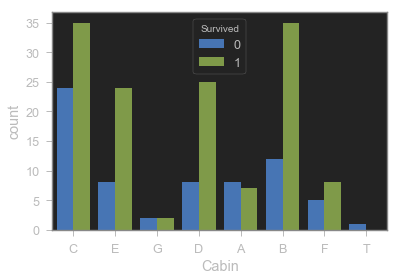

In [7]:
sns.countplot(df_deck, hue=df['Survived']) #Label missing cabins as M and add to this

Deck B, C, D and E have the highest survival rates. 

Those decks are mostly occupied by 1st class passengers. M has the lowest survival rate which is mostly occupied by 2nd and 3rd class passengers. 

To conclude, cabins used by 1st class passengers have higher survival rates than cabins used by 2nd and 3rd class passengers. 

In my opinion M (Missing Cabin values) has the lowest survival rate because they couldn't retrieve the cabin data of the victims. That's why I believe labeling that group as M is a reasonable way to handle the missing data. 

It is a unique group with shared characteristics. Deck feature has high-cardinality right now so some of the values are grouped with each other based on their similarities.

In [8]:
X_all = pd.concat([X, X_test])
X_all

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [9]:
X_all['Deck'] = X_all['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'M')

X_all['Deck'] = X_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
X_all['Deck'] = X_all['Deck'].replace(['D', 'E'], 'DE')
X_all['Deck'] = X_all['Deck'].replace(['F', 'G'], 'FG')

X_all['Deck'].value_counts()

M      1014
ABC     181
DE       87
FG       26
T         1
Name: Deck, dtype: int64

In [10]:
X_all = X_all.drop('Cabin', axis=1)

We see that the train columns with missing data are Age and Embarked.
The test columns with missing data are Age and fare.

I will input missing Age and Fare values with the median, and the Embarked with the mode.

In [11]:
X_all[X_all['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
PassengerId,,,,,,,,,,,
62,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,ABC
830,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,ABC


Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.

In [12]:
X_all['Embarked'] = X_all['Embarked'].fillna('S')

In [13]:
X_all[X_all['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
PassengerId,,,,,,,,,,,
1044,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,M


In [14]:
X_all['Fare'] = X_all['Fare'].fillna(X_all.groupby(['Pclass', 'Parch', 'SibSp', 'Deck'])['Fare'].median()[3][0][0]['M'])

In [15]:
X_all.corr()['Age']

PassengerId    0.028814
Pclass        -0.408106
Age            1.000000
SibSp         -0.243699
Parch         -0.150917
Fare           0.177278
Name: Age, dtype: float64

In [16]:
X_all['Age'] = X_all.groupby('Pclass')['Age'].apply(lambda x: x.fillna(x.median()))

In [17]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1309 non-null object
Deck           1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [18]:
X = X_all[:len(X)]
X_test = X_all[len(X):]

In [19]:
df = X
df['Survived'] = y

In [20]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Survived
PassengerId,,,,,,,,,,,,
1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M,0
2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,ABC,1
3,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,M,1
4,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,ABC,1
5,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,M,0
888,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,ABC,1
889,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,M,0


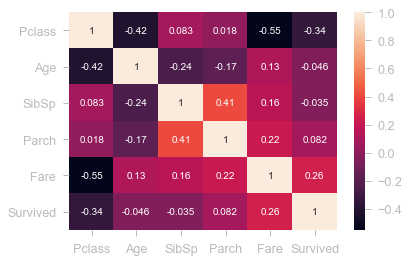

In [21]:
sns.heatmap(df.drop(['PassengerId'], axis=1).corr(), annot=True)

In [22]:
X_all['Fare'] = X_all['Fare'].apply(lambda x: float(x))

In [23]:
X_all['Fare'] = pd.qcut(X_all['Fare'], 13)

In [24]:
X_all['Age'] = pd.qcut(X_all['Age'],8)

In [25]:
#Discrete variables
X_all['Family_Size'] = X_all['SibSp'] + X_all['Parch'] + 1
    
X_all['Ticket_Frequency'] = X_all.groupby('Ticket')['Ticket'].transform('count')

X_all['IsAlone'] = 1 #initialize to yes/1 is alone
X_all['IsAlone'].loc[X_all['Family_Size'] > 1] = 0 # now update to no/0 if family size is greater than 1

#quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
X_all['Title'] = X_all['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

X_all['Is_Married'] = 0
X_all['Is_Married'].loc[X_all['Title'] == 'Mrs'] = 1

In [26]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
X_all['Family_Size_Grouped'] = X_all['Family_Size'].map(family_map)

In [27]:
X_all['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
Lady              1
Jonkheer          1
Don               1
Capt              1
Sir               1
the Countess      1
Mme               1
Dona              1
Name: Title, dtype: int64

We see that there are multiple entries which only come up a few times, we will group these together as 'Other'.

In [28]:
other = (X_all['Title'].value_counts() < 15)
X_all['Title'] = X_all['Title'].apply(lambda x: 'Misc' if other.loc[x] == True else x)

In [29]:
import string

def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

X_all['Family'] = extract_surname(X_all['Name'])
X = X_all.loc[:890]
X_test = X_all.loc[891:]
df = X
df['Survived'] = y
dfs = [X, X_test]

In [30]:
X_all["Title"].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Misc       34
Name: Title, dtype: int64

In [31]:
# Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in X['Family'].unique() if x in X_test['Family'].unique()]
non_unique_tickets = [x for x in X['Ticket'].unique() if x in X_test['Ticket'].unique()]

df_family_survival_rate = df.groupby('Family')['Survived', 'Family','Family_Size'].median()
df_ticket_survival_rate = df.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    # Checking a family exists in both training and test set, and has members more than 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    # Checking a ticket exists in both training and test set, and has members more than 1
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

In [32]:
mean_survival_rate = np.mean(df['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(X)):
    if X['Family'].iloc[i] in family_rates:
        train_family_survival_rate.append(family_rates[X['Family'].iloc[i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(X_test)):
    if X_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[X_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
X['Family_Survival_Rate'] = train_family_survival_rate
X['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
X_test['Family_Survival_Rate'] = test_family_survival_rate
X_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(X)):
    if X['Ticket'].iloc[i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[X['Ticket'].iloc[i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(X_test)):
    if X_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[X_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
X['Ticket_Survival_Rate'] = train_ticket_survival_rate
X['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
X_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
X_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

In [33]:
for df in [X, X_test]:
        df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
        df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2    

In [34]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

dfs = [X, X_test] 
label = LabelEncoder()

non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

In [35]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

X = pd.concat([X, *encoded_features[:6]], axis=1)
X_test = pd.concat([X_test, *encoded_features[6:]], axis=1)

In [36]:
X_all = pd.concat([X, X_test], sort=True).reset_index(drop=True)
drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

X_all.drop(columns=drop_cols, inplace=True)

In [37]:
X = X_all.loc[:890]
X_test = X_all.loc[891:]

In [38]:
X = X.drop('Deck_5', axis=1)
X_test = X_test.drop('Deck_5', axis=1)

Split training data into training and validation sets

In [39]:
from sklearn import model_selection

X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, random_state = 0)

In [40]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier


#Machine Learning Algorithm (MLA) Selection and Initialization
models = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    XGBClassifier()
    ]

from sklearn.preprocessing import MinMaxScaler

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X = scaler.transform(X)

In [41]:
MLA_predict = pd.DataFrame()

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
skf = KFold(n_splits=3, random_state=0)

for model in models:
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    if scores.mean() > 0.8:
        # report performance
        print('Accuracy: {:.3f} ({:.3f}), Model: {}'.format(scores.mean(), scores.std(), str(model).split('(')[0]))
    
        model.fit(X_train, y_train)
        MLA_predict[str(model).split('(')[0]] = model.predict(X_train)

Accuracy: 0.838 (0.009), Model: AdaBoostClassifier
Accuracy: 0.814 (0.018), Model: BaggingClassifier
Accuracy: 0.823 (0.009), Model: GradientBoostingClassifier
Accuracy: 0.814 (0.015), Model: RandomForestClassifier
Accuracy: 0.828 (0.006), Model: GaussianProcessClassifier
Accuracy: 0.846 (0.014), Model: LogisticRegressionCV
Accuracy: 0.852 (0.009), Model: RidgeClassifierCV
Accuracy: 0.801 (0.024), Model: SGDClassifier
Accuracy: 0.817 (0.032), Model: BernoulliNB
Accuracy: 0.801 (0.008), Model: GaussianNB
Accuracy: 0.837 (0.008), Model: SVC
Accuracy: 0.837 (0.017), Model: NuSVC
Accuracy: 0.846 (0.012), Model: LinearSVC
Accuracy: 0.847 (0.009), Model: LinearDiscriminantAnalysis
Accuracy: 0.825 (0.014), Model: XGBClassifier


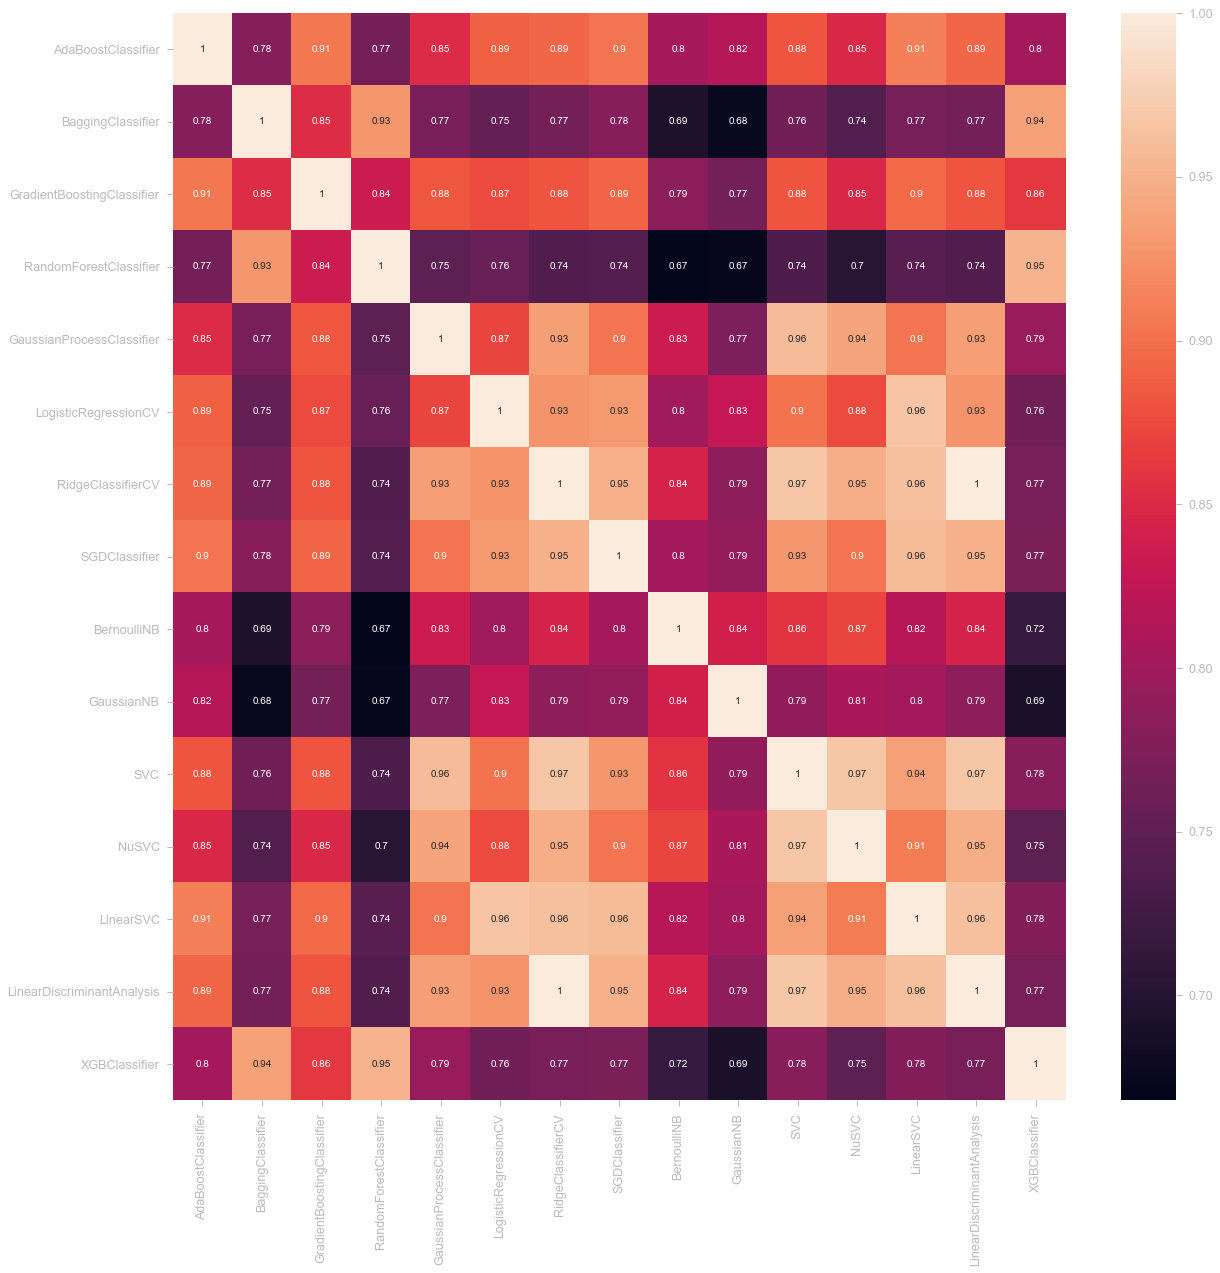

In [42]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(MLA_predict.corr(), annot=True, ax=ax)

In [45]:
'''
from mlxtend.classifier import StackingClassifier


stclf = StackingClassifier([eclf1],
                           meta_classifier = XGBClassifier(),
                           use_features_in_secondary=True)

stack_mod=stclf.fit(X_train, y_train.ravel())
stack_mod.predict(X_val)

stack_mod.score(X_val,y_val)
'''

'\nfrom mlxtend.classifier import StackingClassifier\n\n\nstclf = StackingClassifier([eclf1],\n                           meta_classifier = XGBClassifier(),\n                           use_features_in_secondary=True)\n\nstack_mod=stclf.fit(X_train, y_train.ravel())\nstack_mod.predict(X_val)\n\nstack_mod.score(X_val,y_val)\n'

In [46]:
eclf1.score(X_train,y_train)

0.8637724550898204

In [47]:
eclf1.score(X_val,y_val)

0.8565022421524664

In [48]:
model1 = ensemble.RandomForestClassifier(max_depth=4)
cross_val_score(model1, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

model1.fit(X_train, y_train)

print(model1.score(X_train,y_train), model1.score(X_val,y_val))

0.8547904191616766 0.8430493273542601


In [49]:
model2 = XGBClassifier(max_depth=1, min_child_weight=2, reg_lambda=1.1)
cross_val_score(model2, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

model2.fit(X_train, y_train)

print(model2.score(X_train,y_train), model2.score(X_val,y_val))

0.8577844311377245 0.8430493273542601


In [50]:
model3 = linear_model.LogisticRegression(C=2.53)
cross_val_score(model3, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

model3.fit(X_train, y_train)

print(model3.score(X_train,y_train), model3.score(X_val,y_val))

0.8562874251497006 0.874439461883408


In [51]:
model4 = ensemble.AdaBoostClassifier(n_estimators=14, learning_rate=0.459)
cross_val_score(model4, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

model4.fit(X_train, y_train)

print(model4.score(X_train,y_train), model4.score(X_val,y_val))

0.8458083832335329 0.8295964125560538


In [52]:
model5 = naive_bayes.GaussianNB()
cross_val_score(model5, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

model5.fit(X_train, y_train)

print(model5.score(X_train,y_train), model5.score(X_val,y_val))

0.811377245508982 0.8026905829596412


In [53]:
# Score of more than 0.77
model6 = svm.SVC(probability=True, C=2.5)
cross_val_score(model6, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

model6.fit(X_train, y_train)

print(model6.score(X_train,y_train), model6.score(X_val,y_val))

0.8712574850299402 0.8475336322869955


In [61]:
model7 = discriminant_analysis.LinearDiscriminantAnalysis()
cross_val_score(model7, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

model7.fit(X_train, y_train)

print(model7.score(X_train,y_train), model7.score(X_val,y_val))

0.8547904191616766 0.8565022421524664


In [93]:
model8 = ensemble.GradientBoostingClassifier(learning_rate=0.05, subsample=0.4, max_depth=5)
cross_val_score(model8, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

model8.fit(X_train, y_train)

print(model8.score(X_train,y_train), model8.score(X_val,y_val))

0.9101796407185628 0.905829596412556


In [112]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier([('AdaBoost', model4),
                          ('XGBoost', model2),
                          ('LogisticRegression', model3),
                          ('RandomForest', model1),
                          ('GaussianNB', model5),
                          ('SVM', model6),
                          ('LDA', model7),
                          ('GradBoost', model8)],
                        voting = 'hard')
eclf1 = eclf1.fit(X_train, y_train)

eclf1.predict(X_val)
print(eclf1.score(X_val,y_val),eclf1.score(X_train,y_train))

0.8609865470852018 0.8607784431137725


In [113]:
eclf1.predict_proba_(X_train)

AttributeError: 'VotingClassifier' object has no attribute 'predict_proba_'

In [73]:
'''
from mlxtend.classifier import StackingClassifier


stclf = StackingClassifier([eclf1],
                           meta_classifier = svm.SVC(probability=True, C=2.5),
                           use_features_in_secondary=True)

stack_mod=stclf.fit(X_train, y_train.ravel())
stack_mod.predict(X_val)

stack_mod.score(X_val,y_val)
'''

0.852017937219731

In [55]:
'''
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_val, y_val), tpot.score(X_train, y_train))
'''

'\nfrom tpot import TPOTClassifier\n\ntpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)\ntpot.fit(X_train, y_train)\nprint(tpot.score(X_val, y_val), tpot.score(X_train, y_train))\n'

In [56]:
'''
from sklearn.model_selection import GridSearchCV

eclf1 = ensemble.AdaBoostClassifier(n_estimators=14, learning_rate=0.459)

n_estimators=[14]
learning_rate=[0.458,0.459,0.46,0.461]

hyperF = dict(n_estimators=n_estimators,learning_rate=learning_rate)

gridF = GridSearchCV(eclf1, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

print(bestF.score(X_train,y_train), bestF.score(X_val,y_val))

gridF.best_estimator_
'''

'\nfrom sklearn.model_selection import GridSearchCV\n\neclf1 = ensemble.AdaBoostClassifier(n_estimators=14, learning_rate=0.459)\n\nn_estimators=[14]\nlearning_rate=[0.458,0.459,0.46,0.461]\n\nhyperF = dict(n_estimators=n_estimators,learning_rate=learning_rate)\n\ngridF = GridSearchCV(eclf1, hyperF, cv = 3, verbose = 1, \n                      n_jobs = -1)\nbestF = gridF.fit(X_train, y_train)\n\nprint(bestF.score(X_train,y_train), bestF.score(X_val,y_val))\n\ngridF.best_estimator_\n'

In [110]:
pred = eclf2.predict(X_test)

testfin = pd.read_csv("/Users/patrickfahy99/Documents/Kaggle_datasets/titanic/test.csv")

pred = pd.DataFrame(pred, index=testfin["PassengerId"])

pred.columns = ['Survived']

final_pred = np.column_stack((testfin["PassengerId"].values, pred.values))

pred.to_csv("/Users/patrickfahy99/Documents/Kaggle_datasets/titanic/submit.csv", index=True)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.3s finished


In [58]:
pred

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
